# PROJECT UAS
**Fatur Burhansyah, Muhammad Zidan, Sunanda**

Tujuan: Identifikasi penyakit Kanker Payudara berbasis kecerdasan buatan menggunakan algoritma  KNN

Bentuk Data: Sudah merupakan data terstruktur, data set diambil dari https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

**Parameter eksplanatori (X) =** 'Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin','Resistin', 'MCP_1'
       
**Parameter Target (Y) =**'Positif_Negative'

Dari Parameter diatas maka kita mengetahui ini adalah kasus Supervised Learning dengan parameter target adalah bersifat kategori, sehingga model yang cocok digunakan adalah Model Klasifiasi

**Langkah Langkah**

1. Import semua library yang kira kira diperlukan, standarnya untuk pengolahan data dengan machine learning kita memerlukan, Numpy, Pandas, SK Learn, matplotlib

2. Panggil dataset, dan pahami data dengan menampilkan data ( kolom juga row) dan juga tampilkan summary data

3. Data pre-processing and selection (Cek columns dan colums data types, convert data object to numeric)

4. Train Test Split Dataset.(Atur nilai X, Atur nilai Y, Training dan Test, Normalisaisi, Cek ulang jumlah kolom dan baris dari dataset, Training dan test menjadi data training dan data testing menggunkana fungsi train_test_split)

5. Pilih algoritma klasifikasi (KNN). Modeling (KNN with KNNeighbors)
6. Mencari Setiap Metode Untuk DiPrediksi
7. Analisa hasil

# Penjelasan Library Python

**Dibawah Ini Penjelasan Tentang Modeling Yang Kami Gunakan Sebagai Berikut:**

1.Library Numpy, Berfungsi Melakukan Operasi Proses Komputasi Tipe Data Numerik.

2.Library Pandas, Berfungsi Menyiadakan Struktur Data Dan Analisa Sebuah Data Yang Digunakan.

3.Library Matplotlib, Berfungsi Membuat Table Dan Grafik Untuk Analasisa Sebuah Data Yang Digunakan.

4.Library Klasisfikasi Nearest Neighbor(KNN), Berfungsi Membuat Klasifikasi Pada Data Yang Akan Digunakan Akan Mendapat Table Grafik Efisiensi Komputasi & Akurasi Yang Baik.

In [ ]:
# 1 Panggil Libray yang diperlukan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# langkah 2 Panggil data dan cek kondisi data

# Untuk Memasukan Csv pada Data Kanker
DK = pd.read_csv("DataKanker.csv")

#Menampilkan Data CSV Table Di Python
DK.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP_1,Positif_Negative
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


Data selection
====================

**Cek columns dan colums data types:**

In [ ]:
#3menampilkan Jumlah dataSet dan type data 
print(DK.shape)
print(DK.info())

(116, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               116 non-null    int64  
 1   BMI               116 non-null    float64
 2   Glucose           116 non-null    int64  
 3   Insulin           116 non-null    float64
 4   HOMA              116 non-null    float64
 5   Leptin            116 non-null    float64
 6   Adiponectin       116 non-null    float64
 7   Resistin          116 non-null    float64
 8   MCP_1             116 non-null    float64
 9   Positif_Negative  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB
None


In [ ]:
#4mensortir keseluruhan dataset
print("******************")
#memeriksa baris yg duplikat pada column 
print(DK.duplicated().sum())
print("******************")
#memeriksa baris yg berjumlah kosong pada masing - masing column
print(DK.isna().sum())
print("******************")

******************
0
******************
Age                 0
BMI                 0
Glucose             0
Insulin             0
HOMA                0
Leptin              0
Adiponectin         0
Resistin            0
MCP_1               0
Positif_Negative    0
dtype: int64
******************


In [ ]:
#5menghapus column Age karena tidak berpengaruh
data = DK.drop(columns=['Age'])
 

# Setting Dataset
**Dibawah Ini Pada Data Kanker Menggunakan Data X & Data Y Sebagai Berikut:**

1. Untuk Data X, Sebagai DK_x Terdiri Dari: 'Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin','Resistin', 'MCP_1'
2. Untuk Data Y, Sebagai DK_y Terdiri Dari: 'Positif_Negative'

In [ ]:
#6 memisahkan atribut dan label
predictions = ['BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin','Resistin', 'MCP_1']
X = data[predictions]
y = data['Positif_Negative'] 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BMI          116 non-null    float64
 1   Glucose      116 non-null    int64  
 2   Insulin      116 non-null    float64
 3   HOMA         116 non-null    float64
 4   Leptin       116 non-null    float64
 5   Adiponectin  116 non-null    float64
 6   Resistin     116 non-null    float64
 7   MCP_1        116 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 7.4 KB


# Setting Data Pada Train Dan Test
**Dibawah Ini Pada Data X & Data Y Pada Train & Test Data Kanker Payudara:**
1. Train:60%
2. Test: 40%

1. Untuk Data X Pada Data Kanker Di Train & Test, Diberi Nama Sebagai berikut: **x_train Dan x_test**
2. Untuk Data y Pada Data Kanker Di Train & Test, Diberi Nama Sebagai berikut: **y_train Dan y_test**

In [ ]:
#7 memisakan data training dan data testing
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.4, random_state=50)
print(X_train.shape)
print (X_test.shape)

(69, 8)
(47, 8)


**Memberikan Normalisasi pada Data Yang Digunakan**

In [ ]:
#8 Normalisasi data kedalam skala yg sama pada data atribut
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#9 mengubah nilai y ke dalam numerick
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb.fit(y_train)

y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

# Setting Metode Pada Klasifikasi

**Dibawah Ini Menggunakan 1 Metode:**
1. Metode KNN, Diberi Nama: **KNeighborsClassifier**

Menggunakan Klasifikasi KNN, Pada K-11

In [ ]:
#10 proses training
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

# Evaluasi

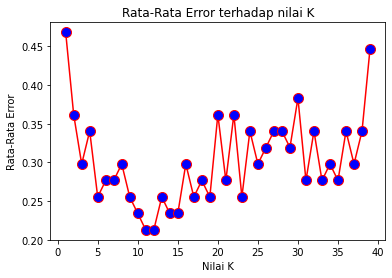

In [ ]:
#11 mencari Nilai K dari erorr yg terendah
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 40), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

# Evaluasi Dan Analisa 

In [ ]:
#11 Evaluasi Dan Analisa Pada KNN Yang Digunakan
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78        21
           1       0.86      0.73      0.79        26

    accuracy                           0.79        47
   macro avg       0.79      0.79      0.79        47
weighted avg       0.80      0.79      0.79        47



Menggunakan Klasifikasi KNN, Pada K=5

In [ ]:
#12 proses training
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

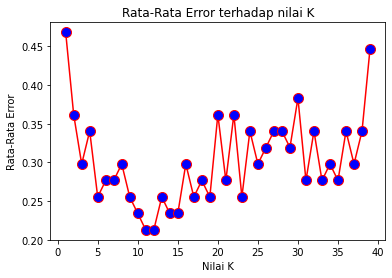

In [ ]:
#12 mencari Nilai K dari erorr yg terendah
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 40), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

In [ ]:
#15 Evaluasi Dan Analisa Pada KNN Yang Digunakan
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73        21
           1       0.79      0.73      0.76        26

    accuracy                           0.74        47
   macro avg       0.74      0.75      0.74        47
weighted avg       0.75      0.74      0.75        47



**Terima Kasih**